In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import calendar

In [2]:
all_data = pd.read_csv("ammar_19.csv")

all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000


In [3]:
all_data['month'] = pd.DatetimeIndex(all_data['tgl_checkout']).month

all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1


In [28]:
results_month = all_data.groupby('month').sum()

results_month_1 = results_month.drop(columns=['id_mitra', 'thn'])
results_month_1.head()

,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,Hour,Minute,Count
month,,,,,,,,
1,2208,193925000,0,9081000,140557000,6206,14587,505
2,2266,219790000,0,9022500,156903500,5552,12769,446
3,2636,270840000,37525250,2158723147,2332798647,7866,18652,625
4,9956,1025251000,356956300,45473494,712921694,28990,69850,2392
5,12602,1714314001,617462850,89679234,1185423884,33755,89661,3021


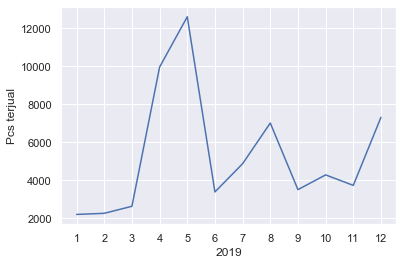

In [42]:
results_month_pcs_chart = sns.lineplot(x=results_month.index, y='jml_pcs', data=results_month)
results_month_pcs_chart.set(xticks=results_month.index)
results_month_pcs_chart.set_xlabel("2019")
results_month_pcs_chart.set_ylabel("Pcs terjual")

results_month_pcs_chart

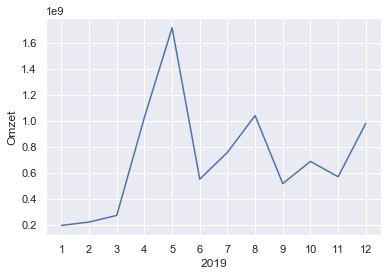

In [46]:
results_month_omzet_chart = sns.lineplot(x=results_month.index, y='total_harga', data=results_month)
results_month_omzet_chart.set(xticks=results_month.index)
results_month_omzet_chart.set_xlabel("2019")
results_month_omzet_chart.set_ylabel("Omzet")

results_month_omzet_chart

In [66]:
results_kab = all_data.groupby('kabupaten').sum()

results_top5 = all_data.groupby('kabupaten').sum().nlargest(5,'total_bayar')


top5 = results_top5.drop(columns=['id_mitra', 'thn','month'])
top5

,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,Hour,Minute,Count
kabupaten,,,,,,,,
Bandung,3149,821663000,273054450,19738000,521680300,12475,29837,1041
Bekasi,1310,236880000,68170750,9855000,164677500,9774,24626,848
Jakarta Pusat,412,143305000,36905000,3212000,103375250,1621,4454,143
Depok,679,146120000,44716250,5723000,97321750,5452,13290,459
Bogor,759,131300000,37445250,6084000,92101500,6098,15394,521


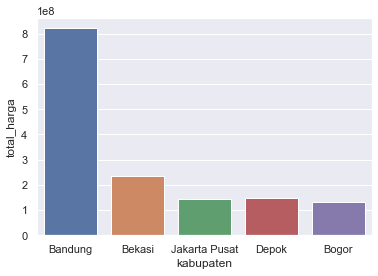

In [67]:
sns.barplot(x=top5.index, y='total_harga', data=top5)

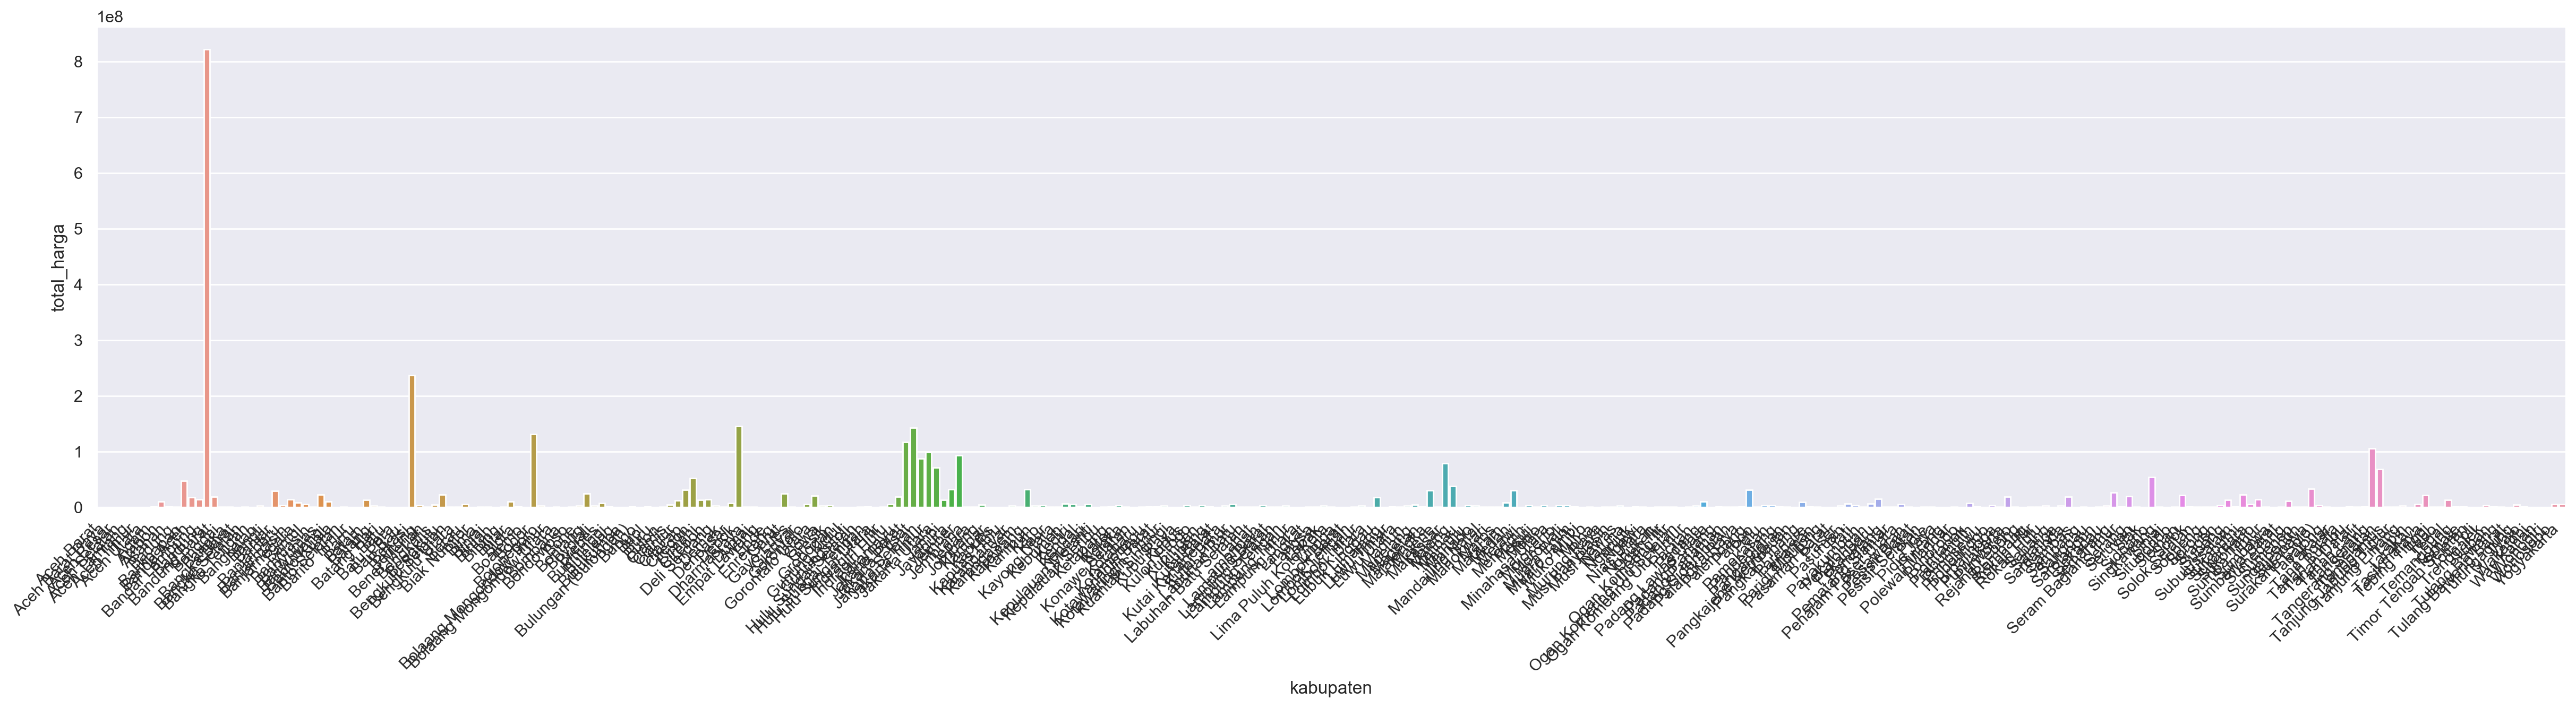

In [65]:
figure(num=None, figsize=(30, 6), dpi=200, facecolor='w', edgecolor='k')
kab_chart = sns.barplot(x=results_kab.index, y='total_harga', data=results_kab)
kab_chart.set_xticklabels(kab_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

kab_chart

In [11]:
all_data['Hour'] = pd.to_datetime(all_data['jam']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['jam']).dt.minute
all_data['Count'] = 1
all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1,12,20,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1,21,10,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1,5,49,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1,7,28,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1,7,33,1


In [68]:
results_prop = all_data.groupby('propinsi').sum()
results_prop5 = all_data.groupby('propinsi').sum().nlargest(5,'total_harga')
results_prop5
#top5 = results_top5.drop(columns=['id_mitra', 'thn', 'Hour', 'Minute', 'Count', 'month'])

,id_mitra,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
propinsi,,,,,,,,,,,
Jawa Barat,5839042,7839777,7414,1602078001,494178700,54619000,1067479800,26173,45574,112817,3883
DKI Jakarta,2377356,2772087,2338,518405000,150345250,17474000,362522500,9981,15598,41097,1373
Jawa Timur,1344984,1413300,1436,307410000,90871250,20827000,217015750,4586,7965,20315,700
Banten,1592005,1780758,1455,252805000,84316250,11123500,173322250,6291,9798,26455,882
Jawa Tengah,1065662,1179096,964,193865000,54380750,12173000,137079000,4258,6601,16805,584


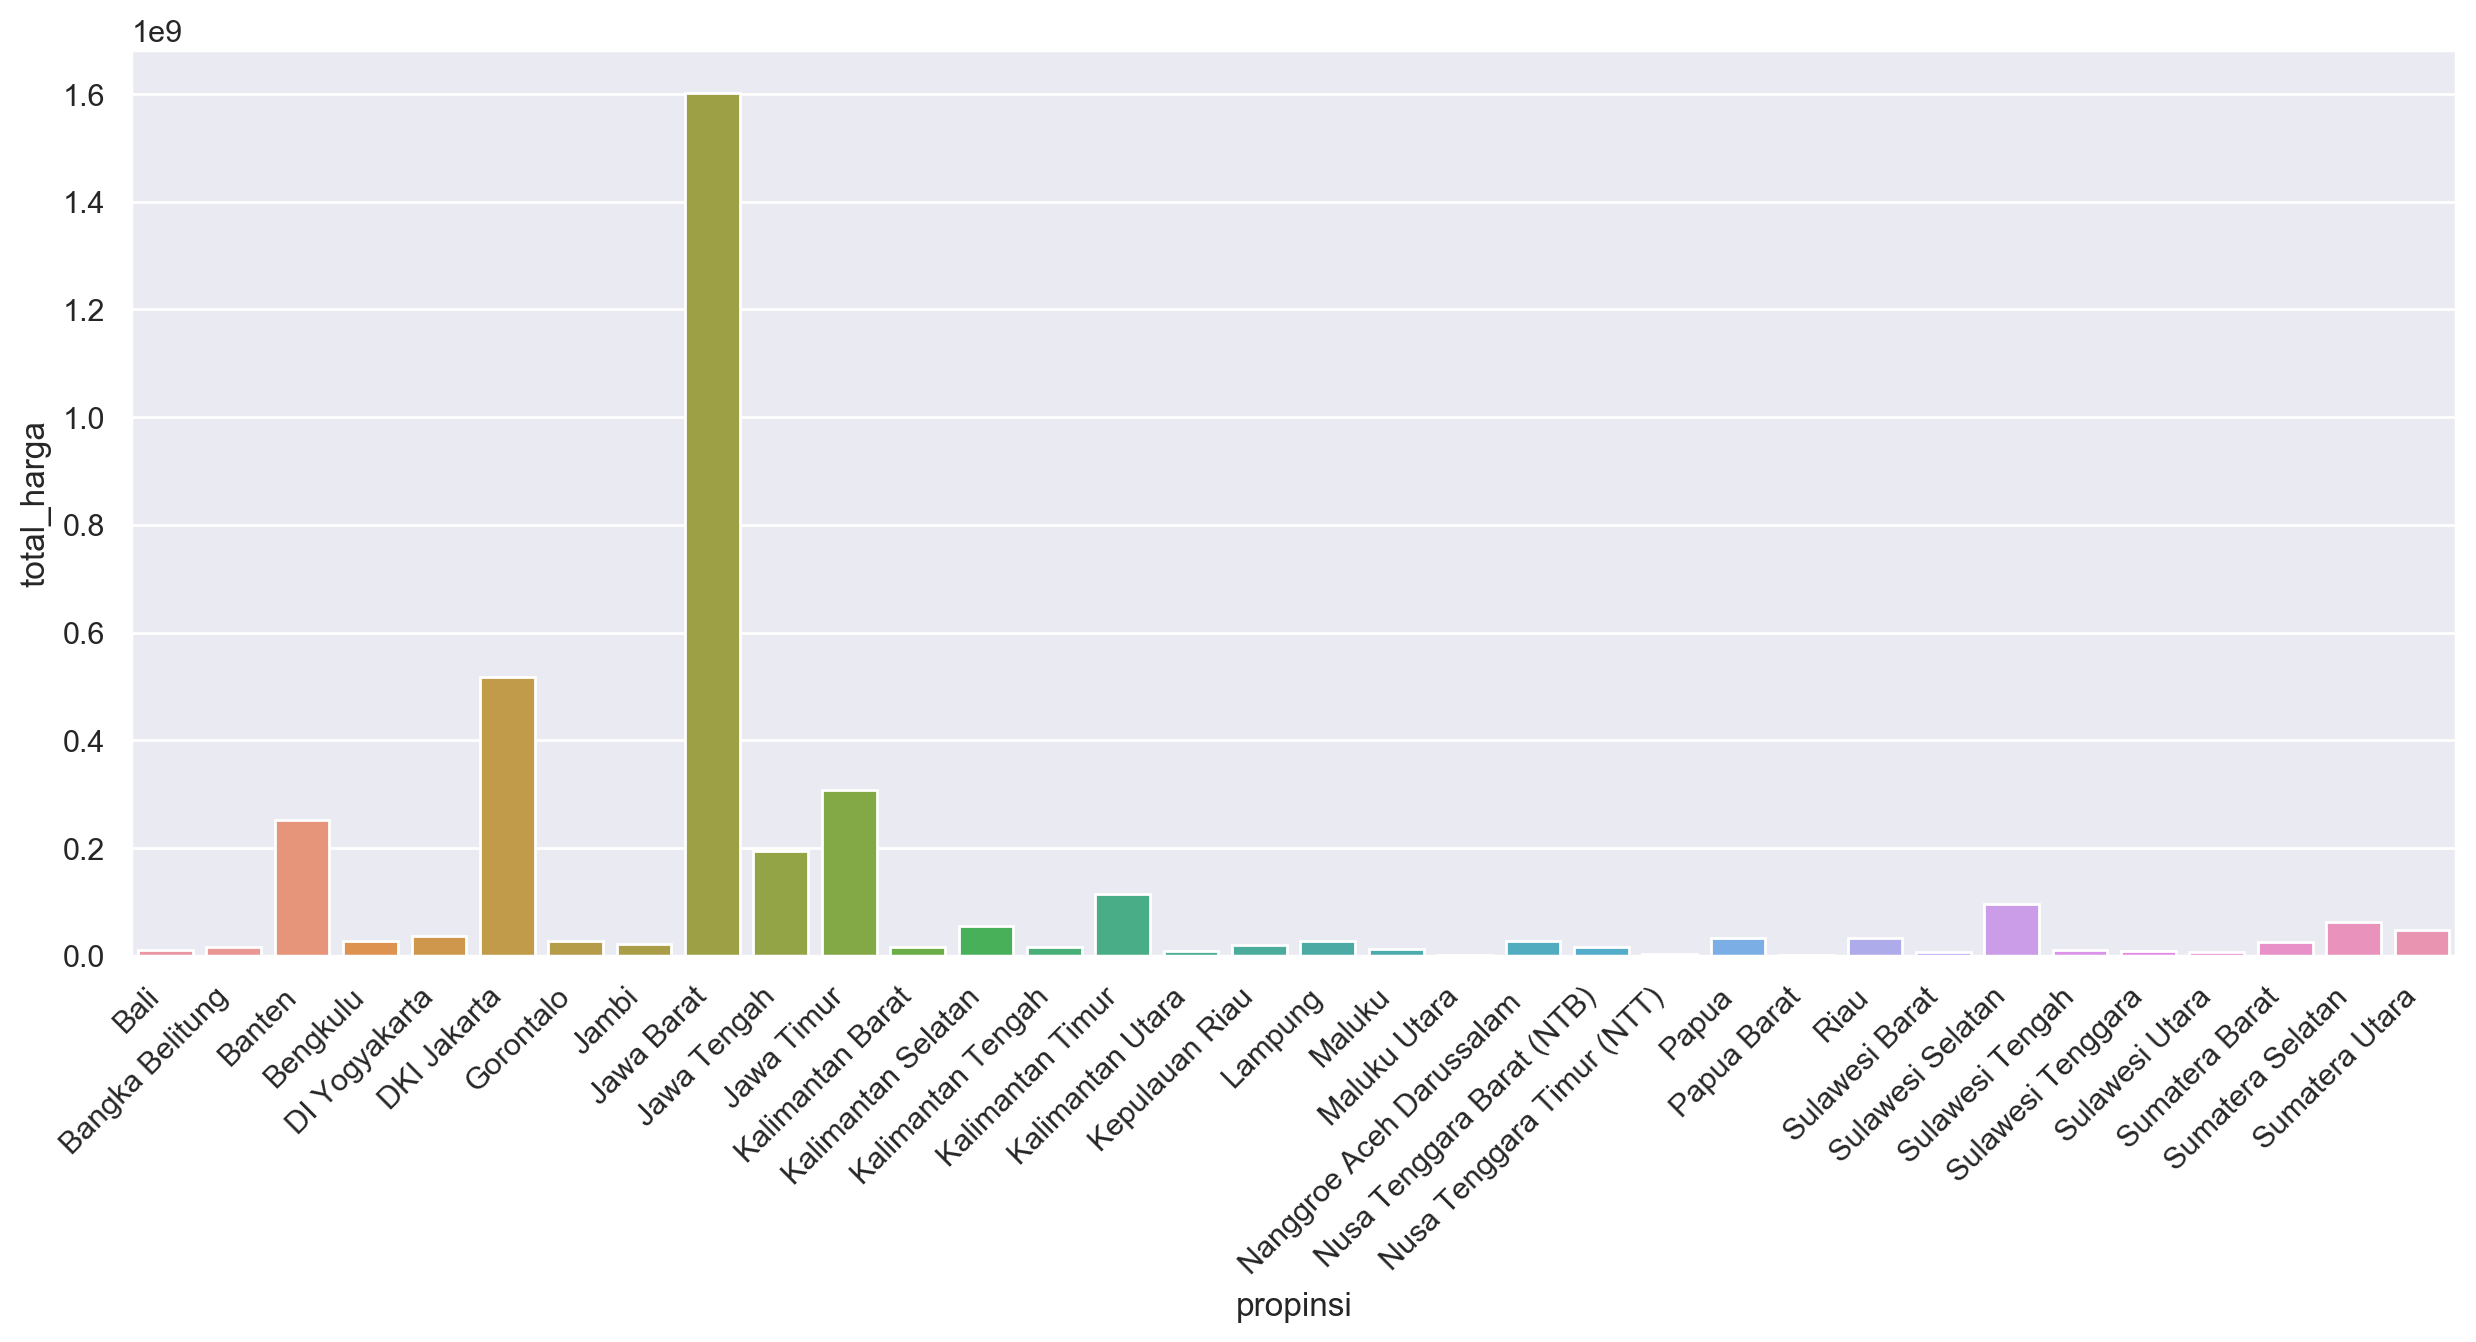

In [87]:
figure(num=None, figsize=(15, 6), dpi=200, facecolor='w', edgecolor='k')
prop_chart = sns.barplot(x=results_prop.index, y='total_harga', data=results_prop)
prop_chart.set_xticklabels(results_prop.index, rotation=45, horizontalalignment='right')

prop_chart

In [14]:
all_data['Hour'] = pd.to_datetime(all_data['jam']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['jam']).dt.minute
all_data['Count'] = 1
all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1,12,20,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1,21,10,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1,5,49,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1,7,28,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1,7,33,1


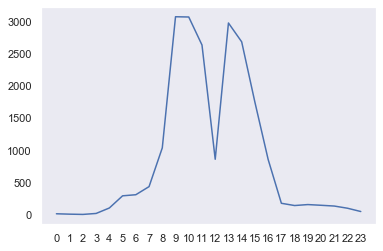

In [15]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# Penjualan tertinggi yaitu di jam 9-10 dan 13. Jika penayangan iklan dilakukan jam 8-9 dan jam 12 akan menghasilkan lebih banyak penjualan.


In [16]:
df = all_data[all_data['invoices'].duplicated(keep=False)]

df.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
17098,1,3010199FI0,rifca AD,NaN,NaN,2019/10/30,11:54,October,2019,13,1340000,402000,160000,1098000,10,11,54,1
17126,2618,3010199FI0,Renna,Jakarta Barat,DKI Jakarta,2019/10/30,20:14,October,2019,1,85000,29750,5000,60250,10,20,14,1


In [17]:
# Load spreadsheet dengan kategori, kode & produk

all_data2 = pd.read_csv("ammar_2019_detail.csv")
all_data2.head()

,id,id_produk,invoices,kategori,kode,nama_produk,ukuran,harga,harga_diskon,harga_profit,jumlah,subtotal,thn,tgl_checkout
0,11131,234,0101F7FD,muslim heroes,MH 03,SHALAHUDDIN AL-AYYUBI (l/xl) (,xl,95000,76000,0,1,95000,2019,1/1/2019
1,11132,258,0101LBDC,raglan,AR31,IBUMU (m/l) (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
2,11133,49,0101LBDC,t-shirt,AT24,MUSLIM HABITS (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
3,11134,243,0101LBDC,raglan,AR28,PRINCESS MUSLIMAH (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
4,11135,201,0201D90C,t-shirt,AT64,Pray before flight (xs/s),s,55000,35750,0,1,55000,2019,2/1/2019


In [18]:
# Drop duplikat di 'Grouped'

df = all_data2[all_data2['invoices'].duplicated(keep=False)]
df['Grouped'] = df.groupby('invoices')['kode'].transform(lambda x: ','.join(x))
df2 = df[['invoices', 'Grouped']].drop_duplicates()
df2.head()

E:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,invoices,Grouped
1,0101LBDC,"AR31,AT24,AR28"
5,0201K3GA,"AT51,JGA05,JGA05,AR35,AT51,JGA05"
11,020167JK,"MH 05,MH 03"
16,0201722B,"JGA05,KH02"
18,0201F56D,"AT69,AT69"


In [19]:
# Kombinasi kode produk paling laris

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(50):
    print(key, value)

('AT51', 'AT51') 1841
('AT51', 'AT59') 1436
('AR17', 'AR17') 1259
('AT51', 'AT58') 1221
('KH01', 'KH02') 1159
('AT59', 'AT59') 1115
('AR24', 'AR24') 1106
('GA04', 'GA05') 1049
('AT34', 'AT34') 1043
('AR28', 'AR28') 1024
('KH01', 'KH03') 1019
('KH02', 'KH03') 1018
('AR24', 'AR25') 1015
('KH02', 'KH04') 1014
('KH01', 'KH04') 1011
('GA04', 'GA04') 934
('KH03', 'KH04') 925
('AR17', 'AT51') 921
('AT59', 'AT51') 905
('AT51', 'GA04') 889
('AR17', 'AR24') 880
('AR17', 'AR28') 832
('AR17', 'AT62') 825
('AT58', 'AT58') 823
('AR17', 'AT34') 816
('AT51', 'AT62') 814
('GA02', 'GA04') 805
('AT58', 'AT59') 797
('AT62', 'AT62') 788
('AR24', 'AT34') 784
('AR28', 'AT51') 784
('AT34', 'AT51') 768
('AT51', 'AT70') 764
('AR24', 'AT51') 764
('AR25', 'AR25') 738
('AT51', 'AR17') 733
('AT51', 'AT34') 725
('GA03', 'GA04') 724
('AT51', 'AR25') 717
('AR24', 'AT62') 712
('AR17', 'AT59') 706
('AT34', 'AR24') 705
('AR17', 'GA04') 703
('AT51', 'AR24') 699
('AR24', 'AT59') 695
('AT58', 'AT51') 685
('AR24', 'GA04') 68

In [20]:
# Kombinasi kategori paling laris

df3 = all_data2[all_data2['invoices'].duplicated(keep=False)]
df3['Grouped'] = df.groupby('invoices')['kategori'].transform(lambda x: ','.join(x))
df4 = df3[['invoices', 'Grouped']].drop_duplicates()

for row in df4['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key, value)

('t-shirt', 't-shirt') 94458
('raglan', 't-shirt') 61883
('t-shirt', 'raglan') 47402
('raglan', 'raglan') 44348
('t-shirt', 'gamis') 23570
('gamis', 't-shirt') 18149
('t-shirt', 'khalifah') 16733
('khalifah', 't-shirt') 16563
('t-shirt', 'jogger pants') 14813
('raglan', 'gamis') 14665
('gamis', 'raglan') 11866
('khalifah', 'raglan') 11759
('gamis', 'gamis') 11696
('raglan', 'khalifah') 10467
('khalifah', 'khalifah') 9591
('raglan', 'jogger pants') 9516
('jogger pants', 't-shirt') 9201
('jogger pants', 'raglan') 6092
('khalifah', 'gamis') 5406
('gamis', 'khalifah') 5257


E:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


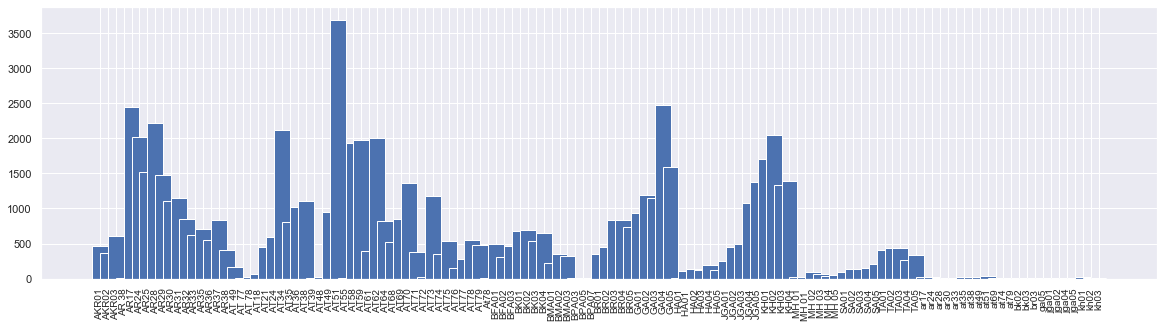

In [21]:
product_group = all_data2.groupby('kode')
quantity_ordered = product_group.sum()['jumlah']

fig= plt.figure(figsize=(20,5))
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered, width = 2)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()



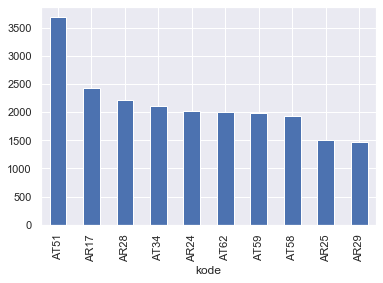

In [22]:
# Menentukan top 10 kode terlaris

produk_top10 = quantity_ordered.head(50).nlargest(10)
produk_top10.plot(kind='bar')
plt.show()

# print(produk_top10[:5])
# fig= plt.figure(figsize=(10,2))
# keys = [pair for pair, df in product_top10]
# plt.bar(keys, quantity_ordered, width = 0.8)
# plt.xticks(keys, rotation='vertical', size=10)
# plt.show()

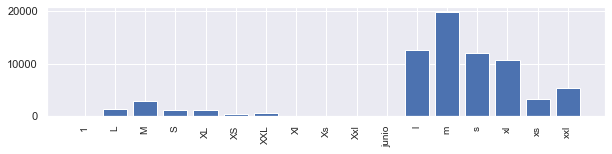

In [23]:
# Ukuran terlaris

product_group_size = all_data2.groupby('ukuran')
quantity_ordered_size = product_group_size.sum()['jumlah']

fig= plt.figure(figsize=(10,2))
keys = [pair for pair, df in product_group_size]
plt.bar(keys, quantity_ordered_size, width = 0.8)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

In [24]:
# stackoverflow

values = np.array([2,5,3,6,4,7,1])   
idx = np.array(list('abcdefg')) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]

# print(type(values))
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

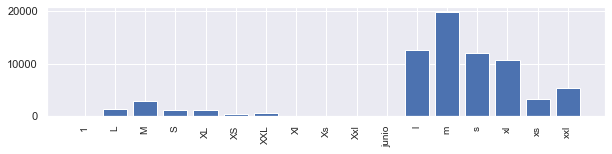

<BarContainer object of 7 artists>

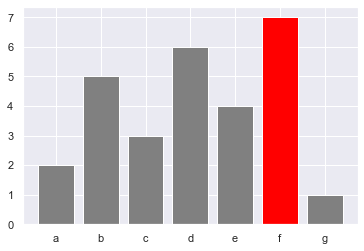

In [25]:
# print(type(quantity_ordered_size))
quantity_ordered_size_arr = np.array(quantity_ordered_size)

fig= plt.figure(figsize=(10,2))
keys = [pair for pair, df in product_group_size]
plt.bar(keys, quantity_ordered_size, width = 0.8)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
plt.bar(idx, values, color=clrs)

In [26]:
# plt.bar(idx, values, color=clrs)

In [27]:
quantity_ordered_size

ukuran
1            1
L         1354
M         2758
S         1223
XL        1158
XS         335
XXL        554
Xl          48
Xs           6
Xxl         15
junio        3
l        12531
m        19757
s        11973
xl       10585
xs        3288
xxl       5403
Name: jumlah, dtype: int64